In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
# Load the datasets into pandas dataframes
dfc = pd.read_csv("../data/crashdata2022-present.csv")
dfv = pd.read_csv("../data/vehicledata2022-present.csv")

In [9]:
# Display the first few rows and info for initial inspection
dfc_info = dfc.info()
# Display the first few rows and info for initial inspection
dfv_info = dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11252 entries, 0 to 11251
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CrashFactId                11252 non-null  int64  
 1   Name                       11252 non-null  object 
 2   MinorInjuries              11252 non-null  int64  
 3   ModerateInjuries           11252 non-null  int64  
 4   SevereInjuries             11252 non-null  int64  
 5   FatalInjuries              11252 non-null  int64  
 6   TcrNumber                  11252 non-null  object 
 7   CityDamageFlag             11252 non-null  bool   
 8   ShortFormFlag              11252 non-null  bool   
 9   Distance                   10654 non-null  float64
 10  CrashDateTime              11252 non-null  object 
 11  PedestrianAction           11252 non-null  object 
 12  RoadwaySurface             11252 non-null  object 
 13  RoadwayCondition           11252 non-null  obj

In [11]:
dfc_head = dfc.head()
dfv_head = dfv.head()

dfc_info

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px

# First, clean the data by handling any missing values or necessary conversions

# Filling missing numerical columns with 0 and categorical with 'Unknown' for simplicity

dfc.fillna(0, inplace=True)

dfv.fillna(0, inplace=True)

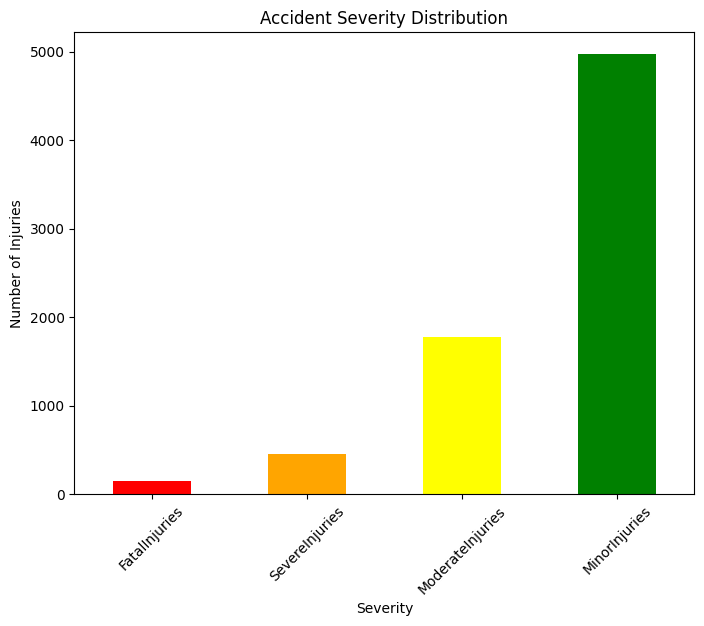

In [17]:
# Renaming df1 to dfc and df2 to dfv in the code and re-running the visualizations

# Visualization 1: Accident Severity Distribution
injury_columns = ['FatalInjuries', 'SevereInjuries', 'ModerateInjuries', 'MinorInjuries']
injury_counts = dfc[injury_columns].sum()

plt.figure(figsize=(8, 6))
injury_counts.plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Accident Severity Distribution')
plt.ylabel('Number of Injuries')
plt.xlabel('Severity')
plt.xticks(rotation=45)
plt.show()

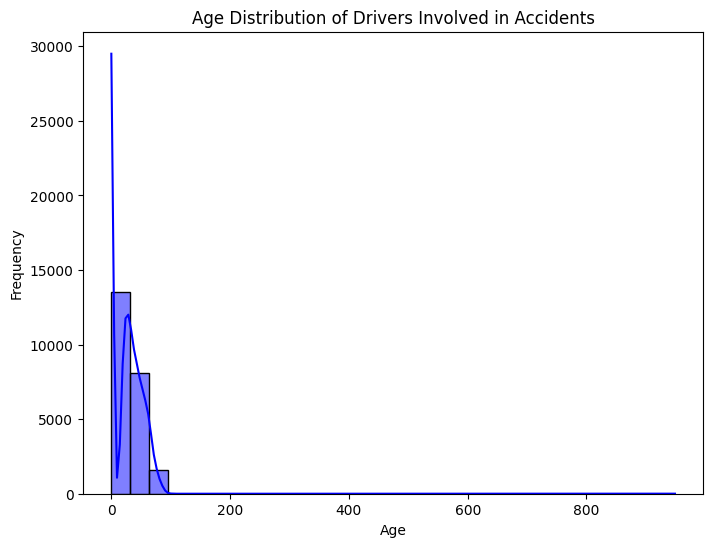

In [20]:
# Visualization 2: Age Distribution of Drivers Involved in Accidents
plt.figure(figsize=(8, 6))
sns.histplot(dfv['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Drivers Involved in Accidents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Visualization 3: Accident Hotspots on a Map (using dfv, which contains Latitude and Longitude)
# Only plot a small sample for visualization purposes
sample_size = 500
accident_map = folium.Map(location=[37.3382, -121.8863], zoom_start=12)  # Centered on San Jose

for i in range(sample_size):
    lat, lon = dfc['Latitude'].iloc[i], dfc['Longitude'].iloc[i]
    folium.CircleMarker([lat, lon], radius=2, color='red', fill=True).add_to(accident_map)

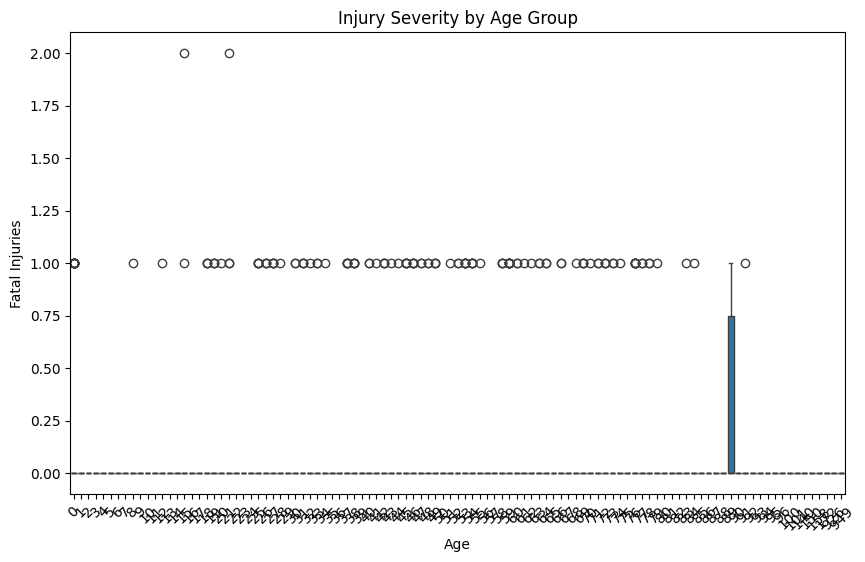

In [25]:
# Visualization 4: Injury Severity by Age Group (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='FatalInjuries', data=dfv)
plt.title('Injury Severity by Age Group')
plt.ylabel('Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

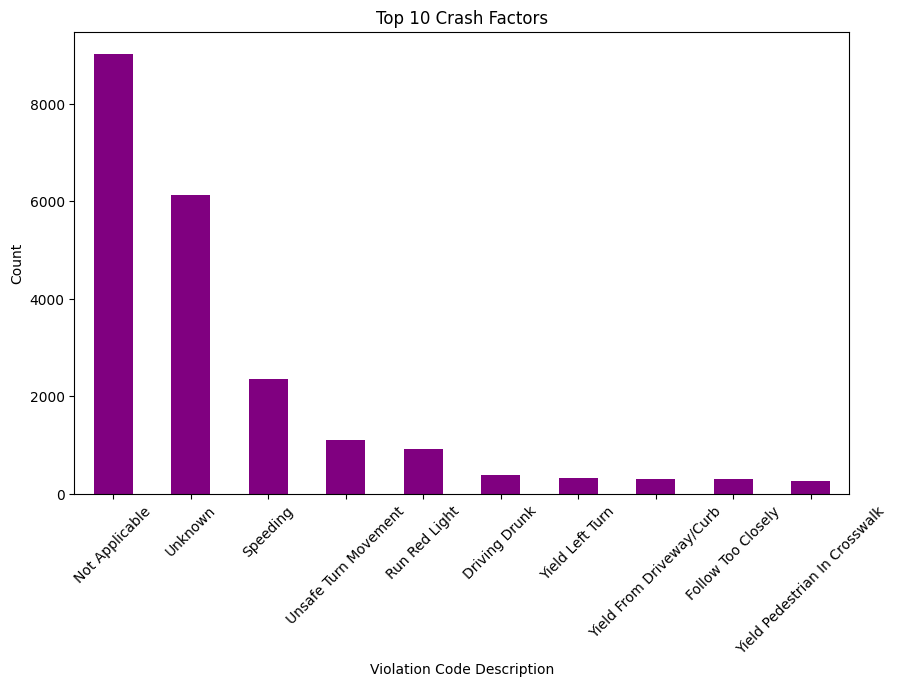

In [27]:
# Visualization 5: Top Crash Factors
plt.figure(figsize=(10, 6))
top_factors = dfv['ViolationCodeDescription'].value_counts().head(10)
top_factors.plot(kind='bar', color='purple')
plt.title('Top 10 Crash Factors')
plt.ylabel('Count')
plt.xlabel('Violation Code Description')
plt.xticks(rotation=45)
plt.show()

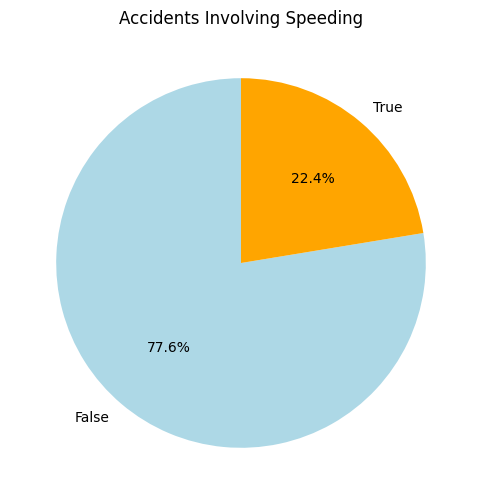

In [29]:
# Visualization 6: Accidents Involving Speeding
plt.figure(figsize=(6, 6))
speeding_flag = dfc['SpeedingFlag'].value_counts()
speeding_flag.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title('Accidents Involving Speeding')
plt.ylabel('')
plt.show()

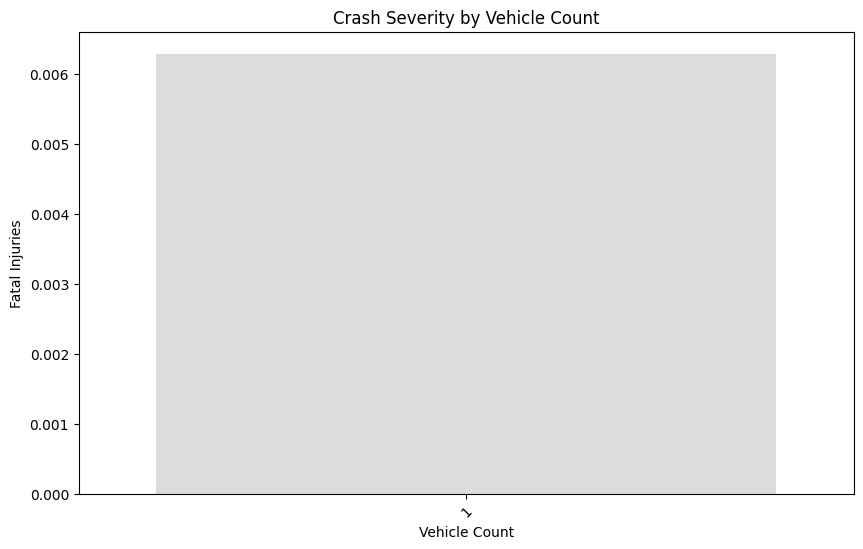

In [36]:
# Visualization 7: Crash Severity by Vehicle Count
plt.figure(figsize=(10, 6))
sns.barplot(x='VehicleCount', y='FatalInjuries', data=dfv, errorbar=None, palette='coolwarm', hue='VehicleCount', legend=False)
plt.title('Crash Severity by Vehicle Count')
plt.ylabel('Fatal Injuries')
plt.xlabel('Vehicle Count')
plt.xticks(rotation=45)
plt.show()

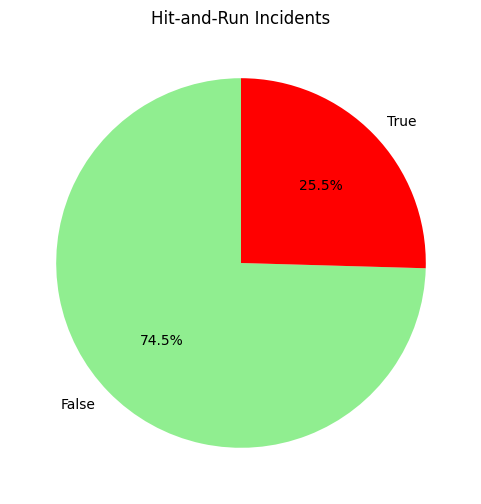

In [37]:
# Visualization 8: Hit-and-Run Incidents
plt.figure(figsize=(6, 6))
hit_and_run = dfc['HitAndRunFlag'].value_counts()
hit_and_run.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'red'], startangle=90)
plt.title('Hit-and-Run Incidents')
plt.ylabel('')
plt.show()

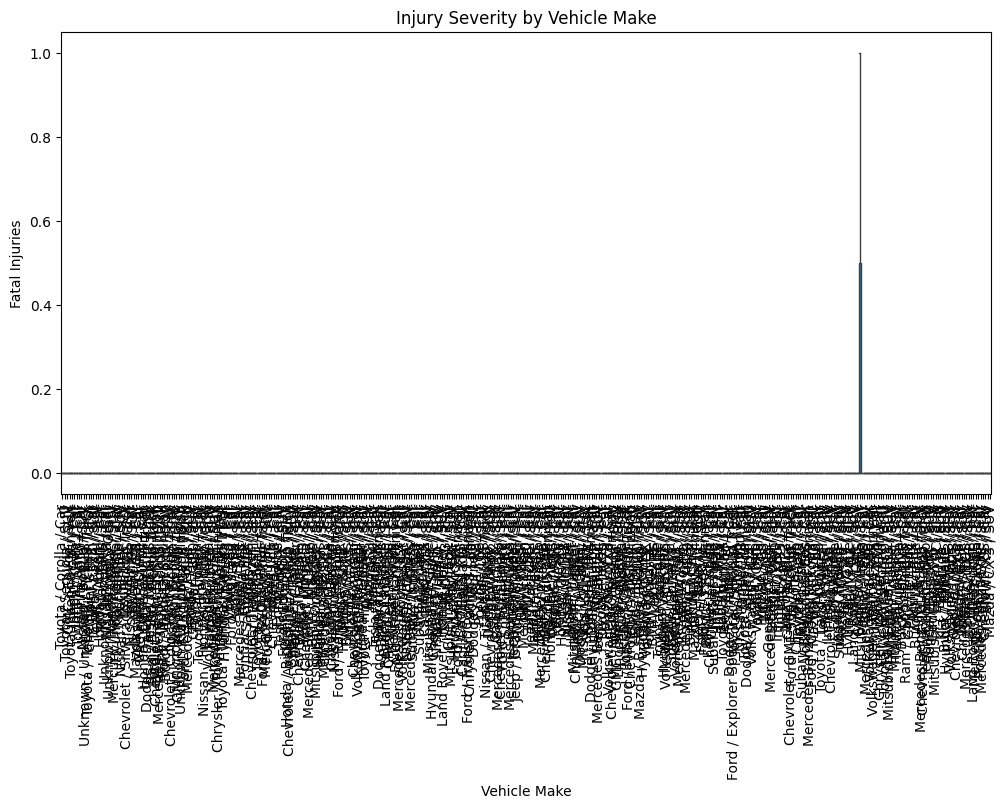

In [38]:
# Visualization 9: Injury Severity by Vehicle Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='VehicleMakeModelType', y='FatalInjuries', data=dfv, showfliers=False)
plt.title('Injury Severity by Vehicle Make')
plt.ylabel('Fatal Injuries')
plt.xlabel('Vehicle Make')
plt.xticks(rotation=90)
plt.show()